In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit              : a60ad39b4a9febdea9a59d602dad44b1538b0ea5
python              : 3.10.12.final.0
python-bits         : 64
OS                  : Linux
OS-release          : 6.2.0-37-generic
Version             : #38~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov  2 18:01:13 UTC 2
machine             : x86_64
processor           : x86_64
byteorder           : little
LC_ALL              : None
LANG                : fr_FR.UTF-8
LOCALE              : fr_FR.UTF-8

pandas              : 2.1.2
numpy               : 1.26.1
pytz                : 2022.1
dateutil            : 2.8.2
setuptools          : 59.6.0
pip                 : 22.0.2
Cython              : 3.0.4
pytest              : None
hypothesis          : None
sphinx              : None
blosc               : None
feather             : None
xlsxwriter          : None
lxml.etree          : None
html5lib            : None
pymysql             : None
psycopg2            : None
jinja2              : 3.1.2


In [3]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',500)

In [3]:
# Chargement des données
app_train_bis = pd.read_csv("app_train_bis.csv")



On vérifie si notre dataframe est équilibré?


In [4]:
app_train_bis["TARGET"].value_counts(True)

TARGET
0.0    0.919271
1.0    0.080729
Name: proportion, dtype: float64

Notre dataframe est très déséquilibré (92% / 8%). Nous allons donc récupérer un échantillon de notre dataframe avec 2500 lignes où la target est égale à 1 et 2500 lignes où la target est égale à 0


In [5]:
df_positif=app_train_bis.loc[app_train_bis['TARGET']==1]
df_positif

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0         100002.0     1.0                   1            0             1   
26        100031.0     1.0                   1            1             1   
40        100047.0     1.0                   1            0             1   
42        100049.0     1.0                   1            1             1   
81        100096.0     1.0                   1            1             1   
...            ...     ...                 ...          ...           ...   
307448    456186.0     1.0                   1            0             1   
307475    456215.0     1.0                   1            1             1   
307481    456225.0     1.0                   1            0             1   
307489    456233.0     1.0                   1            1             1   
307509    456254.0     1.0                   1            1             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     0           0.0          202500.0    406597.5   
26                    0           0.0          112500.0    979992.0   
40                    0           0.0          202500.0   1193580.0   
42                    1           0.0          135000.0    288873.0   
81                    0           0.0           81000.0    252000.0   
...                 ...           ...               ...         ...   
307448                1           1.0          207000.0    450000.0   
307475                1           1.0          144000.0   1303200.0   
307481                0           0.0          225000.0    297000.0   
307489                0           0.0          225000.0    521280.0   
307509                0           0.0          171000.0    370107.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0           24700.5  ...               0.0               0.0   
26          27076.5  ...               0.0               0.0   
40          35028.0  ...               0.0               0.0   
42          16258.5  ...               0.0               0.0   
81          14593.5  ...               0.0               0.0   
...             ...  ...               ...               ...   
307448      32746.5  ...               0.0               0.0   
307475      46809.0  ...               0.0               0.0   
307481      19975.5  ...               0.0               0.0   
307489      23089.5  ...               0.0               0.0   
307509      20205.0  ...               0.0               0.0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                              0.0                        0.0   
26                             0.0                        0.0   
40                             0.0                        0.0   
42                             0.0                        0.0   
81                             0.0                        0.0   
...                            ...                        ...   
307448                         0.0                        0.0   
307475                         0.0                        0.0   
307481                         0.0                        0.0   
307489                         0.0                        0.0   
307509                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                       0.0   
26                             0.0                       0.0   
40                             0.0                       2.0   
42                             0.0                       0.0   
81                             0.0                       0.0   
...                            ...                       ...   
307448                         0.0                       0.0   
307475                         0.0                       1.0   
307481                         0.0                       0.0   
307489                         0.0      

In [6]:
df_négatif=app_train_bis.loc[app_train_bis['TARGET']==0]
df_négatif

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
1         100003.0     0.0                   1            1             1   
2         100004.0     0.0                   0            0             0   
3         100006.0     0.0                   1            1             1   
4         100007.0     0.0                   1            0             1   
5         100008.0     0.0                   1            0             1   
...            ...     ...                 ...          ...           ...   
307505    456249.0     0.0                   1            1             1   
307506    456251.0     0.0                   1            0             1   
307507    456252.0     0.0                   1            1             1   
307508    456253.0     0.0                   1            1             1   
307510    456255.0     0.0                   1            1             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                     1           0.0          270000.0   1293502.5   
2                     0           0.0           67500.0    135000.0   
3                     0           0.0          135000.0    312682.5   
4                     0           0.0          121500.0    513000.0   
5                     0           0.0           99000.0    490495.5   
...                 ...           ...               ...         ...   
307505                0           0.0          112500.0    225000.0   
307506                1           0.0          157500.0    254700.0   
307507                0           0.0           72000.0    269550.0   
307508                0           0.0          153000.0    677664.0   
307510                1           0.0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
1           35698.5  ...               0.0               0.0   
2            6750.0  ...               0.0               0.0   
3           29686.5  ...               0.0               0.0   
4           21865.5  ...               0.0               0.0   
5           27517.5  ...               0.0               0.0   
...             ...  ...               ...               ...   
307505      22050.0  ...               0.0               0.0   
307506      27558.0  ...               0.0               0.0   
307507      12001.5  ...               0.0               0.0   
307508      29979.0  ...               0.0               0.0   
307510      49117.5  ...               0.0               0.0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1                         0.000000                      0.000   
2                         0.000000                      0.000   
3                         0.006402                      0.007   
4                         0.000000                      0.000   
5                         0.000000                      0.000   
...                            ...                        ...   
307505                    0.000000                      0.000   
307506                    0.006402                      0.007   
307507                    0.006402                      0.007   
307508                    1.000000                      0.000   
307510                    0.000000                      0.000   

        AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1                         0.000000                  0.000000   
2                         0.000000                  0.000000   
3                         0.034362                  0.267395   
4                         0.000000                  0.000000   
5                         0.000000                  0.000000   
...                            ...                       ...   
307505                    0.000000                  2.000000   
307506                    0.034362                  0.267395   
307507                    0.034362                  0.267395   
307508                    0.000000      

In [7]:
df_train= pd.concat([df_positif[0:10000],df_négatif[0:10000]])
df_train

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0        100002.0     1.0                   1            0             1   
26       100031.0     1.0                   1            1             1   
40       100047.0     1.0                   1            0             1   
42       100049.0     1.0                   1            1             1   
81       100096.0     1.0                   1            1             1   
...           ...     ...                 ...          ...           ...   
10839    112618.0     0.0                   1            1             1   
10840    112619.0     0.0                   1            1             0   
10841    112620.0     0.0                   1            0             0   
10842    112621.0     0.0                   1            1             0   
10843    112623.0     0.0                   0            0             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    0           0.0          202500.0    406597.5   
26                   0           0.0          112500.0    979992.0   
40                   0           0.0          202500.0   1193580.0   
42                   1           0.0          135000.0    288873.0   
81                   0           0.0           81000.0    252000.0   
...                ...           ...               ...         ...   
10839                0           0.0          202500.0    901813.5   
10840                1           1.0          150750.0   1078200.0   
10841                0           0.0          180000.0    132768.0   
10842                0           1.0           63000.0    239850.0   
10843                1           0.0          225000.0    630000.0   

       AMT_ANNUITY  ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0          24700.5  ...               0.0               0.0   
26         27076.5  ...               0.0               0.0   
40         35028.0  ...               0.0               0.0   
42         16258.5  ...               0.0               0.0   
81         14593.5  ...               0.0               0.0   
...            ...  ...               ...               ...   
10839      29934.0  ...               0.0               0.0   
10840      28570.5  ...               0.0               0.0   
10841       7330.5  ...               0.0               0.0   
10842      28593.0  ...               0.0               0.0   
10843      31500.0  ...               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.000000                      0.000   
26                       0.000000                      0.000   
40                       0.000000                      0.000   
42                       0.000000                      0.000   
81                       0.000000                      0.000   
...                           ...                        ...   
10839                    0.000000                      0.000   
10840                    0.000000                      0.000   
10841                    0.000000                      0.000   
10842                    0.000000                      0.000   
10843                    0.006402                      0.007   

       AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.000000                  0.000000   
26                       0.000000                  0.000000   
40                       0.000000                  2.000000   
42                       0.000000                  0.000000   
81                       0.000000                  0.000000   
...                           ...                       ...   
10839                    0.000000                  5.000000   
10840                    0.000000                  0.000000   
10841                    0.000000                  1.000000   
10842                    0.000000                  0.000000   
10843                    0.034362 

In [8]:
df_train.reset_index(inplace=True)
df_train.head()

index  SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      0    100002.0     1.0                   1            0             1   
1     26    100031.0     1.0                   1            1             1   
2     40    100047.0     1.0                   1            0             1   
3     42    100049.0     1.0                   1            1             1   
4     81    100096.0     1.0                   1            1             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  ...  \
0                0           0.0          202500.0    406597.5  ...   
1                0           0.0          112500.0    979992.0  ...   
2                0           0.0          202500.0   1193580.0  ...   
3                1           0.0          135000.0    288873.0  ...   
4                0           0.0           81000.0    252000.0  ...   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0               0.0               0.0                         0.0   
1               0.0               0.0                         0.0   
2               0.0               0.0                         0.0   
3               0.0               0.0                         0.0   
4               0.0               0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                       0.0   
1                        0.0                       2.0   
2                        2.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  Count_previous_credit  Amount_previous_credit  
0                         1.0                    8.0              865055.565  
1                         2.0                    7.0             3970651.500  
2                         4.0                    5.0             9527634.000  
3                         2.0                    7.0              851747.850  
4                         0.0                    1.0               65610.000  

[5 rows x 121 columns]

### On sépare nos données en X et Y : X contenant les features qui nous permettront de faire notre prédiction et Y contenant notre Target

In [9]:
X = df_train.drop(columns=["TARGET","SK_ID_CURR"],axis=1)
X.head()

index  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      0                   1            0             1                0   
1     26                   1            1             1                0   
2     40                   1            0             1                0   
3     42                   1            1             1                1   
4     81                   1            1             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          202500.0    406597.5      24700.5         351000.0   
1           0.0          112500.0    979992.0      27076.5         702000.0   
2           0.0          202500.0   1193580.0      35028.0         855000.0   
3           0.0          135000.0    288873.0      16258.5         238500.0   
4           0.0           81000.0    252000.0      14593.5         252000.0   

   ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  ...               0.0               0.0                         0.0   
1  ...               0.0               0.0                         0.0   
2  ...               0.0               0.0                         0.0   
3  ...               0.0               0.0                         0.0   
4  ...               0.0               0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        2.0   
2                        2.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  Count_previous_credit  Amount_previous_credit  
0                         1.0                    8.0              865055.565  
1                         2.0                    7.0             3970651.500  
2                         4.0                    5.0             9527634.000  
3                         2.0                    7.0              851747.850  
4                         0.0                    1.0               65610.000  

[5 rows x 119 columns]

In [10]:
# En Y, on cherche à prédire la Target
y = df_train["TARGET"]
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: TARGET, dtype: float64

In [11]:
# On sépare les données numériques des données catégorielles pour utiliser OneHotencoder uniquement sur les variables catégorielles
X_numerical=X.drop(columns=['NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'],axis=1)
X_numerical.head()


index  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      0                   1            0             1                0   
1     26                   1            1             1                0   
2     40                   1            0             1                0   
3     42                   1            1             1                1   
4     81                   1            1             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          202500.0    406597.5      24700.5         351000.0   
1           0.0          112500.0    979992.0      27076.5         702000.0   
2           0.0          202500.0   1193580.0      35028.0         855000.0   
3           0.0          135000.0    288873.0      16258.5         238500.0   
4           0.0           81000.0    252000.0      14593.5         252000.0   

   ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  ...               0.0               0.0                         0.0   
1  ...               0.0               0.0                         0.0   
2  ...               0.0               0.0                         0.0   
3  ...               0.0               0.0                         0.0   
4  ...               0.0               0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        2.0   
2                        2.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  Count_previous_credit  Amount_previous_credit  
0                         1.0                    8.0              865055.565  
1                         2.0                    7.0             3970651.500  
2                         4.0                    5.0             9527634.000  
3                         2.0                    7.0              851747.850  
4                         0.0                    1.0               65610.000  

[5 rows x 115 columns]

In [12]:
# On sépare les données numériques des données catégorielles pour utiliser OneHotencoder uniquement sur les variables catégorielles
X_categorical=X[['NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']]
X_categorical.head()

NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment  Job low salary                  WEDNESDAY   
1  House / apartment  Job low salary                     MONDAY   
2  House / apartment  Job low salary                    TUESDAY   
3  House / apartment  Job low salary                   THURSDAY   
4  House / apartment         Unknown                   THURSDAY   

  ORGANIZATION_TYPE  
0          Business  
1          Business  
2          Business  
3             Other  
4             Other

### On utilise OneHotEncoder pour transformer nos features catégorielles en features numériques exploitables

In [13]:
from sklearn.preprocessing import OneHotEncoder

# On crée objet OneHotEncoder
encoder = OneHotEncoder()

# On l'applique à nos données
encoder.fit(X_categorical)

# On transforme nos données en codage one-hot
X_encoded = encoder.transform(X_categorical)

# On convertit la sortie en DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(X_categorical.columns))


# Affichage des premières lignes
X_encoded_df.head()


NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_Rented apartment  \
0                                  1.0                                 0.0   
1                                  1.0                                 0.0   
2                                  1.0                                 0.0   
3                                  1.0                                 0.0   
4                                  1.0                                 0.0   

   NAME_HOUSING_TYPE_With parents  OCCUPATION_TYPE_Job high salary  \
0                             0.0                              0.0   
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   OCCUPATION_TYPE_Job low salary  OCCUPATION_TYPE_Unknown  \
0                             1.0                      0.0   
1                             1.0                      0.0   
2                             1.0                      0.0   
3                             1.0                      0.0   
4                             0.0                      1.0   

   WEEKDAY_APPR_PROCESS_START_FRIDAY  WEEKDAY_APPR_PROCESS_START_MONDAY  \
0                                0.0                                0.0   
1                                0.0                                1.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   

   WEEKDAY_APPR_PROCESS_START_SATURDAY  WEEKDAY_APPR_PROCESS_START_SUNDAY  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   

   WEEKDAY_APPR_PROCESS_START_THURSDAY  WEEKDAY_APPR_PROCESS_START_TUESDAY  \
0                                  0.0                                 0.0   
1                                  0.0                                 0.0   
2                                  0.0                                 1.0   
3                                  1.0                                 0.0   
4                                  1.0                                 0.0   

   WEEKDAY_APPR_PROCESS_START_WEDNESDAY  ORGANIZATION_TYPE_Business  \
0                                   1.0                         1.0   
1                                   0.0                         1.0   
2                                   0.0                         1.0   
3                                   0.0                         0.0   
4                                   0.0                         0.0   

   ORGANIZATION_TYPE_Other  ORGANIZATION_TYPE_Public services  \
0                      0.0                                0.0   
1                      0.0                                0.0   
2                      0.0                                0.0   
3                      1.0                                0.0   
4                      1.0                                0.0   

   ORGANIZATION_TYPE_Trade_Industry_Transport  
0                                         0.0  
1                                         0.0  
2                                         0.0  
3                                         0.0  
4                                         0.0

In [14]:
display(X_numerical.shape)
display(X_categorical.shape)
display(X_encoded.shape)

(20000, 115)

(20000, 4)

(20000, 17)

In [15]:
# On réunit nos variables encodées aux variables numériques à l'aide de concat
# Fusion des DataFrames numériques et catégoriels
X_combined = pd.concat([X_numerical, X_encoded_df],axis=1)

# Maintenant, X_combined contient à la fois des variables numériques et catégorielles en une seule structure de données
X_combined.head()

index  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      0                   1            0             1                0   
1     26                   1            1             1                0   
2     40                   1            0             1                0   
3     42                   1            1             1                1   
4     81                   1            1             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          202500.0    406597.5      24700.5         351000.0   
1           0.0          112500.0    979992.0      27076.5         702000.0   
2           0.0          202500.0   1193580.0      35028.0         855000.0   
3           0.0          135000.0    288873.0      16258.5         238500.0   
4           0.0           81000.0    252000.0      14593.5         252000.0   

   ...  WEEKDAY_APPR_PROCESS_START_MONDAY  \
0  ...                                0.0   
1  ...                                1.0   
2  ...                                0.0   
3  ...                                0.0   
4  ...                                0.0   

   WEEKDAY_APPR_PROCESS_START_SATURDAY  WEEKDAY_APPR_PROCESS_START_SUNDAY  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   

   WEEKDAY_APPR_PROCESS_START_THURSDAY  WEEKDAY_APPR_PROCESS_START_TUESDAY  \
0                                  0.0                                 0.0   
1                                  0.0                                 0.0   
2                                  0.0                                 1.0   
3                                  1.0                                 0.0   
4                                  1.0                                 0.0   

   WEEKDAY_APPR_PROCESS_START_WEDNESDAY  ORGANIZATION_TYPE_Business  \
0                                   1.0                         1.0   
1                                   0.0                         1.0   
2                                   0.0                         1.0   
3                                   0.0                         0.0   
4                                   0.0                         0.0   

   ORGANIZATION_TYPE_Other  ORGANIZATION_TYPE_Public services  \
0                      0.0                                0.0   
1                      0.0                                0.0   
2                      0.0                                0.0   
3                      1.0                                0.0   
4                      1.0                                0.0   

   ORGANIZATION_TYPE_Trade_Industry_Transport  
0                                         0.0  
1                                         0.0  
2                                         0.0  
3                                         0.0  
4                                         0.0  

[5 rows x 132 columns]

In [16]:
display(X_combined.shape)
display(y.shape)

(20000, 132)

(20000,)

In [17]:
X_combined=X_combined.drop(columns=['index'],axis=1)
X_combined.shape

(20000, 131)

In [18]:
# Nous allons séparer les données de X_combined en données d'entrainement et données de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, train_size=0.8)
X_train.shape, X_test.shape

((16000, 131), (4000, 131))

## On va réduire le nombre de features à l'aide de RFE et RFECV

In [19]:
from sklearn.feature_selection import RFE,RFECV
from sklearn.ensemble import RandomForestClassifier


In [21]:
# Réalisation du RFECV
selector=RFECV(RandomForestClassifier(random_state=55),step=1,cv=5)
selector.fit(X_train,y_train)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=55))

In [22]:
# Rang des features selon leur importance
selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 22,  1,  1, 10,  1,  2,  1,  1,  1,  1,  4,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 17,  1, 20,  5,  3, 23,  1,  9, 21,  8, 19, 12, 11, 16,  6, 18,
        7, 15, 14, 13,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [23]:
#Rang des features selon leur importance
tempbis=pd.DataFrame(selector.ranking_,index=X_train.columns,columns=["Rang"])
tempbis

Rang
NAME_CONTRACT_TYPE                             1
CODE_GENDER                                    1
FLAG_OWN_CAR                                   1
FLAG_OWN_REALTY                                1
CNT_CHILDREN                                   1
AMT_INCOME_TOTAL                               1
AMT_CREDIT                                     1
AMT_ANNUITY                                    1
AMT_GOODS_PRICE                                1
NAME_TYPE_SUITE                                1
NAME_INCOME_TYPE                               1
NAME_EDUCATION_TYPE                            1
NAME_FAMILY_STATUS                             1
REGION_POPULATION_RELATIVE                     1
DAYS_BIRTH                                     1
DAYS_EMPLOYED                                  1
DAYS_REGISTRATION                              1
DAYS_ID_PUBLISH                                1
OWN_CAR_AGE                                    1
FLAG_MOBIL                                    22
FLAG_EMP_PHONE                                 1
FLAG_WORK_PHONE                                1
FLAG_CONT_MOBILE                              10
FLAG_PHONE                                     1
FLAG_EMAIL                                     2
CNT_FAM_MEMBERS                                1
REGION_RATING_CLIENT                           1
REGION_RATING_CLIENT_W_CITY                    1
HOUR_APPR_PROCESS_START                        1
REG_REGION_NOT_LIVE_REGION                     4
REG_REGION_NOT_WORK_REGION                     1
LIVE_REGION_NOT_WORK_REGION                    1
REG_CITY_NOT_LIVE_CITY                         1
REG_CITY_NOT_WORK_CITY                         1
LIVE_CITY_NOT_WORK_CITY                        1
EXT_SOURCE_1                                   1
EXT_SOURCE_2                                   1
EXT_SOURCE_3                                   1
APARTMENTS_AVG                                 1
BASEMENTAREA_AVG                               1
YEARS_BEGINEXPLUATATION_AVG                    1
YEARS_BUILD_AVG                                1
COMMONAREA_AVG                                 1
ELEVATORS_AVG                                  1
ENTRANCES_AVG                                  1
FLOORSMAX_AVG                                  1
FLOORSMIN_AVG                                  1
LANDAREA_AVG                                   1
LIVINGAPARTMENTS_AVG                           1
LIVINGAREA_AVG                                 1
NONLIVINGAPARTMENTS_AVG                        1
NONLIVINGAREA_AVG                              1
APARTMENTS_MODE                                1
BASEMENTAREA_MODE                              1
YEARS_BEGINEXPLUATATION_MODE                   1
YEARS_BUILD_MODE                               1
COMMONAREA_MODE                                1
ELEVATORS_MODE                                 1
ENTRANCES_MODE                                 1
FLOORSMAX_MODE                                 1
FLOORSMIN_MODE                                 1
LANDAREA_MODE                                  1
LIVINGAPARTMENTS_MODE                          1
LIVINGAREA_MODE                                1
NONLIVINGAPARTMENTS_MODE                       1
NONLIVINGAREA_MODE                             1
APARTMENTS_MEDI                                1
BASEMENTAREA_MEDI                              1
YEARS_BEGINEXPLUATATION_MEDI                   1
YEARS_BUILD_MEDI                               1
COMMONAREA_MEDI                                1
ELEVATORS_MEDI                                 1
ENTRANCES_MEDI                                 1
FLOORSMAX_MEDI                                 1
FLOORSMIN_MEDI                                 1
LANDAREA_MEDI                                  1
LIVINGAPARTMENTS_MEDI                          1
LIVINGAREA_MEDI                                1
NONLIVINGAPARTMENTS_MEDI                       1
NONLIVINGAREA_MEDI                             1
TOTALAREA_MODE                                 1
OBS_30_CNT_SOCIAL_CIRCLE  

In [24]:
# Nombre optimal de features à sélectionner
selector.n_features_

109

Optimal number of features : 109
Best features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       ...
       'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'WEEKDAY_APPR_PROCESS_START_SATURDAY',
       'WEEKDAY_APPR_PROCESS_START_SUNDAY',
       'WEEKDAY_APPR_PROCESS_START_THURSDAY',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY',
       'WEEKDAY_APPR_PROCESS_START_WEDNESDAY', 'ORGANIZATION_TYPE_Business',
       'ORGANIZATION_TYPE_Other', 'ORGANIZATION_TYPE_Public services',
       'ORGANIZATION_TYPE_Trade_Industry_Transport'],
      dtype='object', length=109)
Original features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       ...
       'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'WEEK

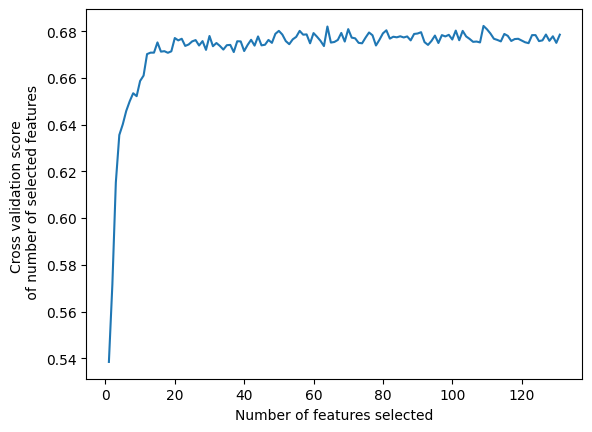

In [25]:
print('Optimal number of features :', selector.n_features_)
print('Best features :', X_train.columns[selector.support_])
print('Original features :', X_train.columns)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(selector.cv_results_["mean_test_score"]) + 1), selector.cv_results_["mean_test_score"])
plt.show()

\## On selectionne les dix premières features 

In [20]:
# Réalisation du RFE avec 10 features
selectorbis=RFE(RandomForestClassifier(random_state=55), n_features_to_select=10)
selectorbis.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(random_state=55), n_features_to_select=10)

In [21]:
X_train_RFE= selectorbis.transform(X_train)
X_test_RFE= selectorbis.transform(X_test)

In [22]:
pd.DataFrame(X_train_RFE).head()

0        1        2       3       4       5         6         7  \
0   312840.0   8379.0 -16590.0  -500.0 -1381.0  -130.0  0.273115  0.510853   
1  1125000.0  33025.5 -14340.0 -2936.0 -8403.0 -4990.0  0.487742  0.647977   
2   630000.0  19228.5 -12556.0 -1420.0 -1627.0 -4012.0  0.007748  0.506484   
3   270000.0  13500.0 -16871.0  -422.0 -2343.0  -395.0  0.727265  0.661024   
4   790830.0  62613.0 -10930.0 -3255.0 -5582.0  -810.0  0.595897  0.056861   

        8           9  
0    -2.0    24270.39  
1 -2740.0  1884447.00  
2  -155.0  2814309.00  
3  -390.0  1729822.50  
4  -170.0  2209908.60

In [23]:
# Nom des features
mask= selectorbis.support_
data_reduit=X_train.loc[:,mask]
colonnes=data_reduit.columns
colonnes

Index(['AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'Amount_previous_credit'],
      dtype='object')

In [24]:
data_reduit.shape

(16000, 10)

In [25]:
data_reduit.head()

AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
3807     312840.0       8379.0    -16590.0         -500.0            -1381.0   
191     1125000.0      33025.5    -14340.0        -2936.0            -8403.0   
3351     630000.0      19228.5    -12556.0        -1420.0            -1627.0   
13381    270000.0      13500.0    -16871.0         -422.0            -2343.0   
417      790830.0      62613.0    -10930.0        -3255.0            -5582.0   

       DAYS_ID_PUBLISH  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
3807            -130.0      0.273115      0.510853                    -2.0   
191            -4990.0      0.487742      0.647977                 -2740.0   
3351           -4012.0      0.007748      0.506484                  -155.0   
13381           -395.0      0.727265      0.661024                  -390.0   
417             -810.0      0.595897      0.056861                  -170.0   

       Amount_previous_credit  
3807                 24270.39  
191                1884447.00  
3351               2814309.00  
13381              1729822.50  
417                2209908.60

In [32]:
#Installation MLFlow
#%pip install mlflow

In [26]:
import mlflow
import mlflow.sklearn

In [27]:
mlflow.set_experiment("Modèles de prédiction Crédit")
mlflow.sklearn.autolog()

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,fbeta_score
from sklearn.metrics import roc_auc_score

In [29]:
# fonction de coût prenant en compte le fait qu'un faux positif coûte 10 fois plus cher qu'un faux négatif
def cost_score(y_true,y_pred,fn_cost=10, fp_cost=1):
    fn = np.sum((y_true == 1) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    loss = fn * fn_cost + fp * fp_cost
    score = loss
    return score


In [30]:
# Fonction pour identifier le seuil optimal

def find_optimal_threshold(y_true, y_pred, fn_cost=10, fp_cost=1, threshold_range=(0, 1), threshold_step=0.01):
    thresholds = np.arange(threshold_range[0], threshold_range[1] + threshold_step, threshold_step)
    
    best_score = float('inf')
    best_threshold = None

    for threshold in thresholds:
        y_pred_thresholded = (y_pred >= threshold).astype(int)
        score = cost_score(y_true, y_pred_thresholded, fn_cost, fp_cost)

        if score < best_score:
            best_score = score
            best_threshold = threshold

    print(f"Seuil optimal : {best_threshold}")
    print(f"Meilleur score associé : {best_score}")

    return best_threshold, best_score


In [31]:
#fonction du MLFlow permettant d'enregistrer les expériences 

def train_and_log_model(model, X_train, y_train, X_test, y_test, hyperparameters=None, run_name="Model", metrics=None):
    # Check if there's an active run and end it
    if mlflow.active_run():
        mlflow.end_run()

    with mlflow.start_run(run_name=run_name) as run:
        # Utiliser des hyperparamètres s'ils sont fournis
        if hyperparameters is not None:
            model.set_params(**hyperparameters)
            # Log hyperparamaters
            mlflow.log_params(hyperparameters)
            

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Log the model
        mlflow.sklearn.log_model(model, "Trained_Model")

        # Log metrics
        if metrics is not None:
            for metric_name, metric_func in metrics.items():
                metric_value = metric_func(y_test, y_pred)
                mlflow.log_metric(metric_name, metric_value)

        # Log Business score
        if "Business score" in metrics:
            business_score_value = metrics["Business score"](y_test, y_pred)
            mlflow.log_metric("Business score", business_score_value)

        # Autolog other metrics and parameters
        mlflow.autolog()





In [32]:
# Appliquons un modèle RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RFC=RandomForestClassifier(random_state=55)


# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10]

}

# Créer un objet GridSearchCV
grid_search_RFC = GridSearchCV(RFC, param_grid, cv=5, scoring='accuracy')


# Effectuer la recherche sur grille sur les données d'entraînement
grid_search_RFC.fit(X_train_RFE, y_train)

# Afficher les meilleurs paramètres et la meilleure performance
print("Meilleurs paramètres trouvés:", grid_search_RFC.best_params_)
print("Meilleure précision trouvée:", grid_search_RFC.best_score_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire les données de test
y_pred_proba_RFC = grid_search_RFC.best_estimator_.predict_proba(X_test_RFE)[:, 1]

# Utiliser find_optimal_threshold pour obtenir le seuil optimal
optimal_threshold_RFC, _ = find_optimal_threshold(y_test, y_pred_proba_RFC)

# Appliquer le seuil optimal pour obtenir les prédictions binaires
y_pred_optimal_threshold_RFC = (y_pred_proba_RFC >= optimal_threshold_RFC).astype(int)


# Définir les métriques à suivre
metrics_to_log = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 score": f1_score,
    "F2 score": lambda y_test, y_pred: fbeta_score(y_test, y_pred, beta=2),
    "ROC_AUC": roc_auc_score,
    "Business score":lambda y_test, y_pred_optimal_threshold_RFC: cost_score(y_test, y_pred_optimal_threshold_RFC)
}


# Appeler la fonction avec les hyperparamètres
train_and_log_model(RFC, X_train_RFE, y_train, X_test_RFE, y_test, hyperparameters=grid_search_RFC.best_params_, run_name="Random Forest Classifier", metrics=metrics_to_log)

# Sauvegarde du meilleur modèle :
RFC_model = grid_search_RFC.best_estimator_

2023/12/12 12:43:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'db11c0bb53ae4f4b968176c48540d006', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/12/12 12:43:22 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2023/12/12 12:44:16 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2023/12/12 12:44:16 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Meilleurs paramètres trouvés: {'max_depth': 10, 'n_estimators': 100}
Meilleure précision trouvée: 0.6656875
Seuil optimal : 0.13
Meilleur score associé : 2023


2023/12/12 12:44:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [33]:
# Appliquons un modèle de Régression logistique
from sklearn.linear_model import LogisticRegression

RL=LogisticRegression()

#Définir la grille des hyperparamètres à tester
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Créer un objet GridSearchCV
grid_search_RL = GridSearchCV(RL, param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur grille sur les données d'entraînement
grid_search_RL.fit(X_train_RFE, y_train)

# Afficher les meilleurs paramètres et la meilleure performance
print("Meilleurs paramètres trouvés:", grid_search_RL.best_params_)
print("Meilleure précision trouvée:", grid_search_RL.best_score_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire les données de test
y_pred_proba_RL = grid_search_RL.best_estimator_.predict_proba(X_test_RFE)[:, 1]

# Utiliser find_optimal_threshold pour obtenir le seuil optimal
optimal_threshold_RL, _ = find_optimal_threshold(y_test, y_pred_proba_RL)

# Appliquer le seuil optimal pour obtenir les prédictions binaires
y_pred_optimal_threshold_RL = (y_pred_proba_RL >= optimal_threshold_RL).astype(int)


# Définir les métriques à suivre
metrics_to_log = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 score": f1_score,
    "F2 score": lambda y_test, y_pred: fbeta_score(y_test, y_pred, beta=2),
    "ROC_AUC": roc_auc_score,
    "Business score":lambda y_test, y_pred_optimal_threshold_RL: cost_score(y_test, y_pred_optimal_threshold_RL)
}


# Appeler la fonction avec les hyperparamètres
train_and_log_model(RL, X_train_RFE, y_train, X_test_RFE, y_test, hyperparameters=grid_search_RL.best_params_, run_name="Logistic Regression", metrics=metrics_to_log)

# Sauvegarde du meilleur modèle
RL_model = grid_search_RL.best_estimator_

2023/12/12 12:45:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5d051210858e436da6a16273d9f1034f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/12/12 12:45:00 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


/home/karima/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/karima/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Meilleurs paramètres trouvés: {'C': 1, 'penalty': 'l2'}
Meilleure précision trouvée: 0.5598124999999999
Seuil optimal : 0.29
Meilleur score associé : 2023


/home/karima/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2023/12/12 12:45:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [34]:
# Appliquons un modèle XGBoost

from xgboost import XGBClassifier

XGB=XGBClassifier(random_state=55)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Créer un objet GridSearchCV
grid_search_XGB = GridSearchCV(XGB, param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur grille sur les données d'entraînement
grid_search_XGB.fit(X_train_RFE, y_train)

# Afficher les meilleurs paramètres et la meilleure performance
print("Meilleurs paramètres trouvés:", grid_search_XGB.best_params_)
print("Meilleure précision trouvée:", grid_search_XGB.best_score_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire les données de test
y_pred_proba_XGB = grid_search_XGB.best_estimator_.predict_proba(X_test_RFE)[:, 1]

# Utiliser find_optimal_threshold pour obtenir le seuil optimal
optimal_threshold_XGB, _ = find_optimal_threshold(y_test, y_pred_proba_XGB)

# Appliquer le seuil optimal pour obtenir les prédictions binaires
y_pred_optimal_threshold_XGB = (y_pred_proba_XGB >= optimal_threshold_XGB).astype(int)
    

# Définir les métriques à suivre
metrics_to_log = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 score": f1_score,
    "F2 score": lambda y_test, y_pred: fbeta_score(y_test, y_pred, beta=2),
    "ROC_AUC": roc_auc_score,
    "Business score":lambda y_test, y_pred_optimal_threshold_XGB: cost_score(y_test, y_pred_optimal_threshold_XGB)
}



# Appeler la fonction avec les hyperparamètres
train_and_log_model(XGB, X_train_RFE, y_train, X_test_RFE, y_test, hyperparameters=grid_search_XGB.best_params_, run_name="XGBoost", metrics=metrics_to_log)

# Sauvegarde du meilleur modèle
XGB_model = grid_search_XGB.best_estimator_


2023/12/12 12:45:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2023/12/12 12:45:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8c5cee580ad34682be2e38dfb3540b9f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/12/12 12:45:09 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2023/12/12 12:46:03 INFO mlflow.sklearn.utils: Logging the 5 best runs, 103 runs will be omitted.


Meilleurs paramètres trouvés: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Meilleure précision trouvée: 0.6715625000000001
Seuil optimal : 0.08
Meilleur score associé : 2016


2023/12/12 12:46:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/karima/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:46:03] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified."
2023/12/12 12:46:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/12/12 12:46:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


In [42]:
#pip install catboost

In [35]:
# Appliquons un modèle Catboost
from catboost import CatBoostClassifier

CBC = CatBoostClassifier(random_state=55)
    

# Définir la grille des hyperparamètres à tester
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [50, 100, 150],
    'depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bylevel': [0.8, 1.0],
}

# Créer un objet GridSearchCV
grid_search_CBC = GridSearchCV(CBC, param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur grille sur les données d'entraînement
grid_search_CBC.fit(X_train_RFE, y_train)

# Afficher les meilleurs paramètres et la meilleure performance
print("Meilleurs paramètres trouvés:", grid_search_CBC.best_params_)
print("Meilleure précision trouvée:", grid_search_CBC.best_score_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire les données de test
y_pred_proba_CBC = grid_search_CBC.best_estimator_.predict_proba(X_test_RFE)[:, 1]

# Utiliser find_optimal_threshold pour obtenir le seuil optimal
optimal_threshold_CBC, _ = find_optimal_threshold(y_test, y_pred_proba_CBC)

# Appliquer le seuil optimal pour obtenir les prédictions binaires
y_pred_optimal_threshold_CBC = (y_pred_proba_CBC >= optimal_threshold_CBC).astype(int)

# Définir les métriques à suivre
metrics_to_log = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 score": f1_score,
    "F2 score": lambda y_test, y_pred: fbeta_score(y_test, y_pred, beta=2),
    "ROC_AUC": roc_auc_score,
    "Business score":lambda y_test, y_pred_optimal_threshold_CBC: cost_score(y_test, y_pred_optimal_threshold_CBC)
}



# Appeler la fonction avec les hyperparamètres
train_and_log_model(CBC, X_train_RFE, y_train, X_test_RFE, y_test, hyperparameters=grid_search_CBC.best_params_, run_name="CatBoost", metrics=metrics_to_log)

# Sauvegarde du meilleur modèle
CBC_model = grid_search_CBC.best_estimator_



2023/12/12 12:46:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '896a0f6667c448e5be5bfa815ca22c64', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/12/12 12:46:05 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


0:	learn: 0.6921139	total: 48.4ms	remaining: 2.37s
1:	learn: 0.6910683	total: 49.5ms	remaining: 1.19s
2:	learn: 0.6900341	total: 50.3ms	remaining: 788ms
3:	learn: 0.6890250	total: 51.3ms	remaining: 590ms
4:	learn: 0.6880807	total: 52.1ms	remaining: 469ms
5:	learn: 0.6871915	total: 52.9ms	remaining: 388ms
6:	learn: 0.6862236	total: 53.9ms	remaining: 331ms
7:	learn: 0.6852812	total: 54.9ms	remaining: 288ms
8:	learn: 0.6843139	total: 55.6ms	remaining: 253ms
9:	learn: 0.6837445	total: 56.5ms	remaining: 226ms
10:	learn: 0.6828009	total: 57.3ms	remaining: 203ms
11:	learn: 0.6819491	total: 58.4ms	remaining: 185ms
12:	learn: 0.6810389	total: 59.2ms	remaining: 168ms
13:	learn: 0.6800972	total: 60ms	remaining: 154ms
14:	learn: 0.6792977	total: 60.8ms	remaining: 142ms
15:	learn: 0.6784874	total: 61.6ms	remaining: 131ms
16:	learn: 0.6776523	total: 62.3ms	remaining: 121ms
17:	learn: 0.6768484	total: 62.9ms	remaining: 112ms
18:	learn: 0.6760287	total: 63.6ms	remaining: 104ms
19:	learn: 0.6752052	tot

2023/12/12 12:47:31 INFO mlflow.sklearn.utils: Logging the 5 best runs, 103 runs will be omitted.


Meilleurs paramètres trouvés: {'colsample_bylevel': 0.8, 'depth': 5, 'iterations': 150, 'learning_rate': 0.1, 'subsample': 0.8}
Meilleure précision trouvée: 0.6719375000000001
Seuil optimal : 0.13
Meilleur score associé : 2019
0:	learn: 0.6815378	total: 1.34ms	remaining: 200ms
1:	learn: 0.6720485	total: 2.26ms	remaining: 167ms
2:	learn: 0.6644451	total: 3.13ms	remaining: 153ms
3:	learn: 0.6578634	total: 4.01ms	remaining: 146ms
4:	learn: 0.6526463	total: 4.82ms	remaining: 140ms
5:	learn: 0.6468028	total: 5.73ms	remaining: 138ms
6:	learn: 0.6420426	total: 6.73ms	remaining: 137ms
7:	learn: 0.6381493	total: 7.6ms	remaining: 135ms
8:	learn: 0.6350651	total: 8.48ms	remaining: 133ms
9:	learn: 0.6318081	total: 9.43ms	remaining: 132ms
10:	learn: 0.6290415	total: 10.6ms	remaining: 134ms
11:	learn: 0.6264038	total: 11.5ms	remaining: 132ms
12:	learn: 0.6243066	total: 12.4ms	remaining: 130ms
13:	learn: 0.6224171	total: 13.2ms	remaining: 128ms
14:	learn: 0.6211333	total: 14ms	remaining: 126ms
15:	le

2023/12/12 12:47:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/12/12 12:47:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


In [36]:
import pyngrok
from pyngrok import ngrok

In [37]:
ngrok.kill()
NGROK_AUTH_TOKEN="2Y85rje5Ug3KMh8ztUpKuxdxuKa_7mztXToHt8oZfSZyrcYLq"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
ngrok_tunnel=ngrok.connect(addr="5000",proto="http",bind_tls=True)
print("MLFlow Tracking UI:",ngrok_tunnel.public_url)

t=2023-12-12T12:47:32+0100 lvl=warn msg="ngrok config file found at legacy location, move to XDG location" xdg_path=/home/karima/.config/ngrok/ngrok.yml legacy_path=/home/karima/.ngrok2/ngrok.yml


MLFlow Tracking UI: https://60ed-195-68-82-225.ngrok-free.app


In [38]:
!mlflow ui


[2023-12-12 12:47:34 +0100] [13448] [INFO] Starting gunicorn 21.2.0
[2023-12-12 12:47:34 +0100] [13448] [INFO] Listening at: http://127.0.0.1:5000 (13448)
[2023-12-12 12:47:34 +0100] [13448] [INFO] Using worker: sync
[2023-12-12 12:47:34 +0100] [13449] [INFO] Booting worker with pid: 13449
[2023-12-12 12:47:34 +0100] [13450] [INFO] Booting worker with pid: 13450
[2023-12-12 12:47:34 +0100] [13451] [INFO] Booting worker with pid: 13451
[2023-12-12 12:47:34 +0100] [13452] [INFO] Booting worker with pid: 13452
^C
[2023-12-12 12:52:53 +0100] [13448] [INFO] Handling signal: int
[2023-12-12 12:52:53 +0100] [13451] [INFO] Worker exiting (pid: 13451)
[2023-12-12 12:52:53 +0100] [13452] [INFO] Worker exiting (pid: 13452)
[2023-12-12 12:52:53 +0100] [13450] [INFO] Worker exiting (pid: 13450)
[2023-12-12 12:52:53 +0100] [13449] [INFO] Worker exiting (pid: 13449)


In [39]:
# Nous allons utiliser le score AUC; Pour cela il nous faut calculer les probabilités prédites par chacun de nos modèles
y_pred_proba_RFC = RFC_model.predict_proba(X_test_RFE)[:, 1]  # probabilités de la classe positive
y_pred_proba_RL = RL_model.predict_proba(X_test_RFE)[:, 1]
y_pred_proba_XGB = XGB_model.predict_proba(X_test_RFE)[:, 1]
y_pred_proba_CBC = CBC_model.predict_proba(X_test_RFE)[:, 1]

t=2023-12-12T12:53:04+0100 lvl=warn msg="failed to open private leg" id=d58a9090b168 privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"


In [41]:
from sklearn.metrics import roc_auc_score
# Score du modèle RandomForestClassifier
auc_RFC = roc_auc_score(y_test, y_pred_proba_RFC)
auc_RFC

0.7200649818429408

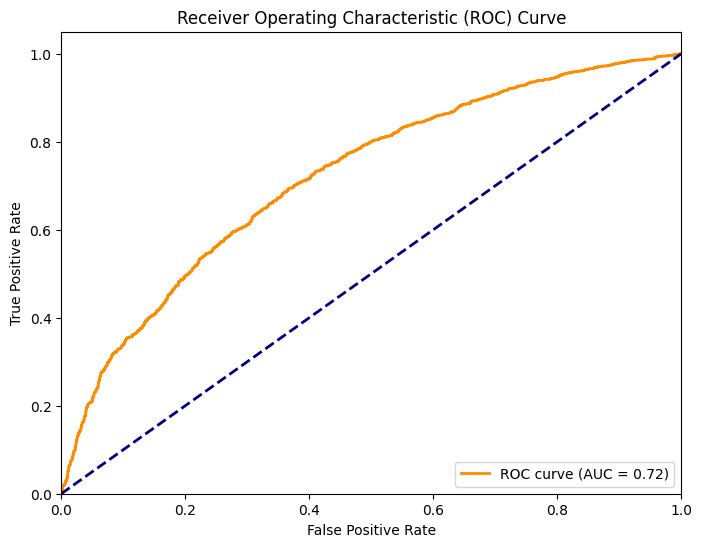

In [42]:
from sklearn.metrics import roc_curve
# Courbe ROC pour RandomForestRegressor

# Calculez le taux de faux positifs (FPR) et le taux de vrais positifs (TPR) à partir des prédictions de probabilité.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_RFC)

# Calculez l'aire sous la courbe ROC (AUC) pour évaluer la performance du modèle.
roc_auc = roc_auc_score(y_test, y_pred_proba_RFC)

# Tracez la courbe ROC à l'aide de Matplotlib.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




In [43]:
# Score du modèle de Regression logistique
auc_RL = roc_auc_score(y_test, y_pred_proba_RL)
auc_RL

0.5760264808261305

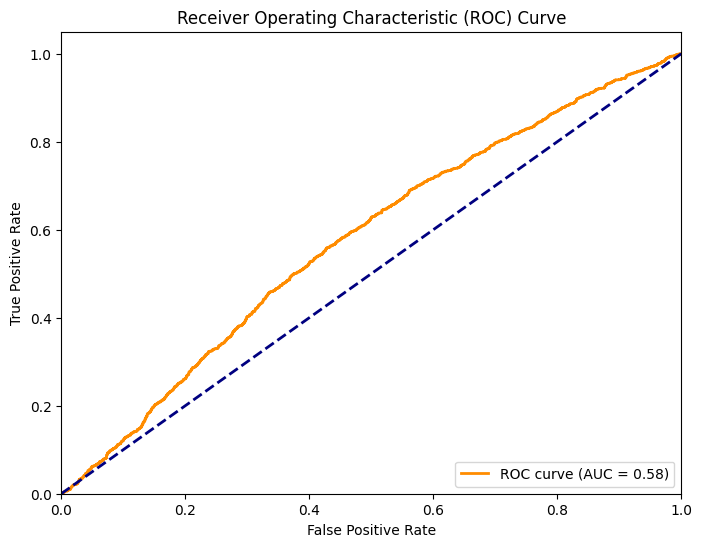

t=2023-12-12T12:53:19+0100 lvl=warn msg="failed to open private leg" id=e02eca434b83 privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"
t=2023-12-12T12:53:34+0100 lvl=warn msg="failed to open private leg" id=e6977df54c40 privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"


In [44]:
# Courbe ROC pour Regression logistique

# Calculez le taux de faux positifs (FPR) et le taux de vrais positifs (TPR) à partir des prédictions de probabilité.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_RL)

# Calculez l'aire sous la courbe ROC (AUC) pour évaluer la performance du modèle.
roc_auc = roc_auc_score(y_test, y_pred_proba_RL)

# Tracez la courbe ROC à l'aide de Matplotlib.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [52]:
# Score du modèle XGBoost
auc_XGB = roc_auc_score(y_test, y_pred_proba_XGB)
auc_XGB

0.7210820216293229

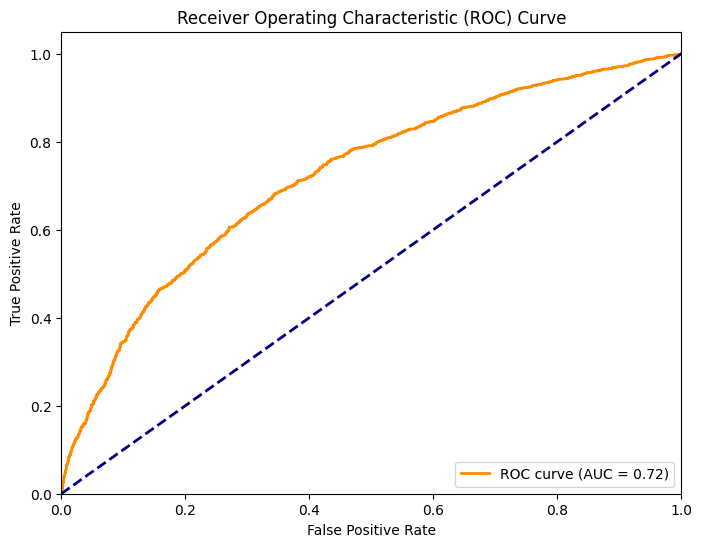

In [53]:
# Courbe ROC pour XGBoost

# Calculez le taux de faux positifs (FPR) et le taux de vrais positifs (TPR) à partir des prédictions de probabilité.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_XGB)

# Calculez l'aire sous la courbe ROC (AUC) pour évaluer la performance du modèle.
roc_auc = roc_auc_score(y_test, y_pred_proba_XGB)

# Tracez la courbe ROC à l'aide de Matplotlib.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [54]:
# Score du modèle CatBoost
auc_CBC = roc_auc_score(y_test, y_pred_proba_CBC)
auc_CBC

0.7275151200332088

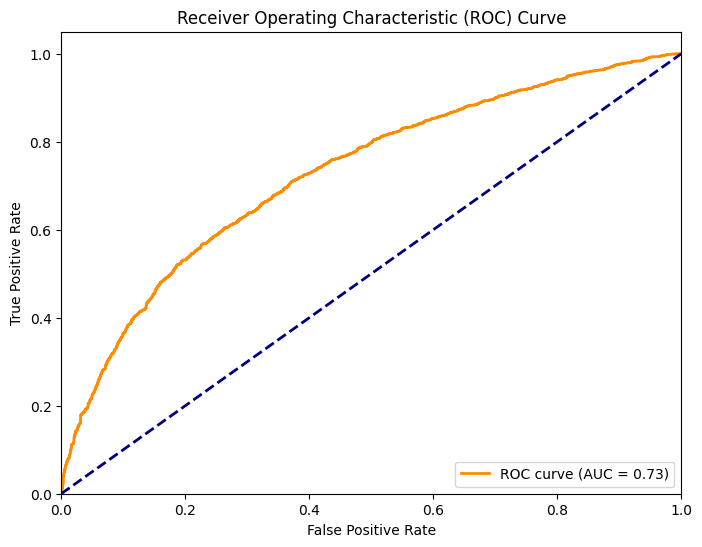

In [56]:
# Courbe ROC pour CatBoost

# Calculez le taux de faux positifs (FPR) et le taux de vrais positifs (TPR) à partir des prédictions de probabilité.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_CBC)

# Calculez l'aire sous la courbe ROC (AUC) pour évaluer la performance du modèle.
roc_auc = roc_auc_score(y_test, y_pred_proba_CBC)

# Tracez la courbe ROC à l'aide de Matplotlib.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [57]:
# il est important de faire ressortir les FN (Faux négatifs) car perte de capital
# les FP(Faux positifs) sont moins risqués car perte d'interêt seulement
# le coût d’un FN est dix fois supérieur au coût d’un FP

def custom_metric(y, y_pred):
    TP = np.sum( (y==1) & (y_pred==1) )
    FP = np.sum( (y==0) & (y_pred==1) )
    TN = np.sum( (y==0) & (y_pred==0) )
    FN = np.sum( (y==1) & (y_pred==0) )
# Fowlkes–Mallows index
# https://en.wikipedia.org/wiki/Confusion_matrix
# https://en.wikipedia.org/wiki/Fowlkes%E2%80%93Mallows_index
# Positive Predictive Value PPV = Precision
    PPV = TP / (TP + FP)
# True Positive Rate TPR = Recall
    TPR = TP / (TP + FN)
    FMI = np.sqrt( PPV * TPR )
    return FMI

def custom_metric_f2(y, y_pred):
    """
        https://machinelearningmastery.com/fbeta-measure-for-machine-learning/
        F2-Measure
            The F2-measure is an example of the Fbeta-measure with a beta value of 2.0.

            It has the effect of lowering the importance of precision and increase the importance of recall.

            If maximizing precision minimizes false positives, and maximizing recall minimizes false negatives,

            then the F2-measure puts more attention on minimizing false negatives than minimizing false positives.

    """
    return fbeta_score(y, y_pred,beta=2)


# fonction de coût prenant en compte le fait qu'un faux positif coûte 10 fois plus cher qu'un faux négatif
def cost_score(y_true,y_pred,fn_cost=10, fp_cost=1):
    fn = np.sum((y_true == 1) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    loss = fn * fn_cost + fp * fp_cost
    score = loss
    return score



In [58]:
def model_eval_score(model, Xval, yval):
    yval_pred = model.predict(Xval)
    conf_mat = confusion_matrix(yval, yval_pred)

     
    yval_proba = model.predict_proba(Xval)[:, 1]
    optimal_threshold, _ = find_optimal_threshold(yval, yval_proba)
    y_pred_optimal_threshold = (yval_proba >= optimal_threshold).astype(int)

     #Plotting the confusion matrix as a heatmap
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print(f'Accuracy score    : {accuracy_score(yval, yval_pred):.3f}')
    print(f'precision score   : {precision_score(yval, yval_pred):.3f}')
    print(f'recall score      : {recall_score(yval, yval_pred):.3f}')
    print(f'F1 score          : {f1_score(yval, yval_pred):.3f}')
    print(f'F2 score          : {fbeta_score(yval, yval_pred, beta=2):.3f}')
    print(f'ROCAUC score      : {roc_auc_score(yval, yval_pred):.3f}')
    print(f'custom metric FMI : {custom_metric(yval, yval_pred):.3f}')
    print(f'score business    : {cost_score(y_test, y_pred_optimal_threshold)}')
    print()

def model_eval(model, Xval, yval):
    model_eval_score(model, Xval, yval)

    yval_proba = model.predict_proba(Xval)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(yval, yval_proba)
    roc_auc = roc_auc_score(yval, yval_proba)

    plt.figure(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # Optimisation du seuil pour l'AUC
    # On utilise la courbe ROC pour trouver le seuil qui donne le meilleur équilibre entre le taux de vrais positifs (TPR) et
    #le taux de faux positifs (FPR). Le seuil optimal est choisi de manière à maximiser TPR - FPR.
    #optimal_threshold = find_optimal_threshold_bis(yval, yval_proba)
    #print("Seuil optimal pour l'AUC : {:.2f}".format(optimal_threshold))

#def find_optimal_threshold_bis(y_true, y_probs):
#   fpr, tpr, thresholds = roc_curve(y_true, y_probs)
#   optimal_idx = np.argmax(tpr - fpr)
#   optimal_threshold = thresholds[optimal_idx]
#   return optimal_threshold




Seuil optimal : 0.17
Meilleur score associé : 2048


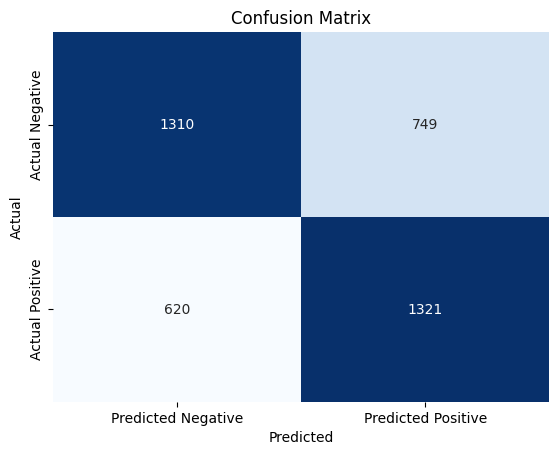

Accuracy score    : 0.658
precision score   : 0.638
recall score      : 0.681
F1 score          : 0.659
F2 score          : 0.672
ROCAUC score      : 0.658
custom metric FMI : 0.659
score business    : 2048



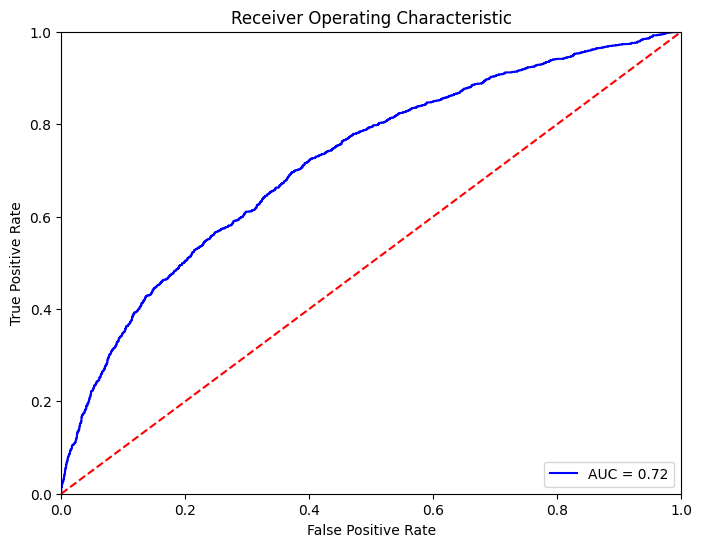

In [59]:
model_eval(RFC_model,X_test_RFE,y_test)

Seuil optimal : 0.18
Meilleur score associé : 2058


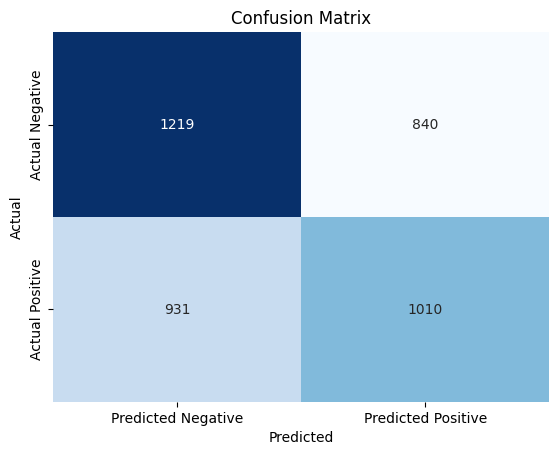

Accuracy score    : 0.557
precision score   : 0.546
recall score      : 0.520
F1 score          : 0.533
F2 score          : 0.525
ROCAUC score      : 0.556
custom metric FMI : 0.533
score business    : 2058



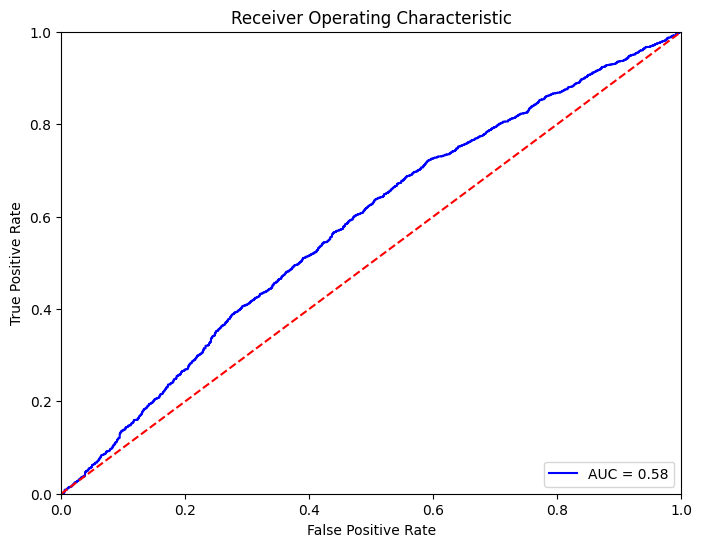

In [60]:
model_eval(RL_model,X_test_RFE,y_test)

Seuil optimal : 0.0
Meilleur score associé : 2059


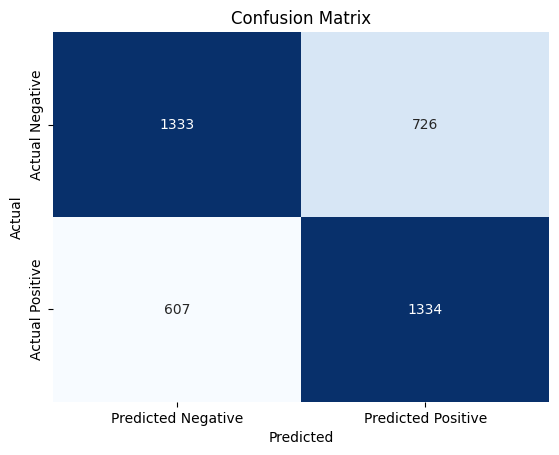

Accuracy score    : 0.667
precision score   : 0.648
recall score      : 0.687
F1 score          : 0.667
F2 score          : 0.679
ROCAUC score      : 0.667
custom metric FMI : 0.667
score business    : 2059



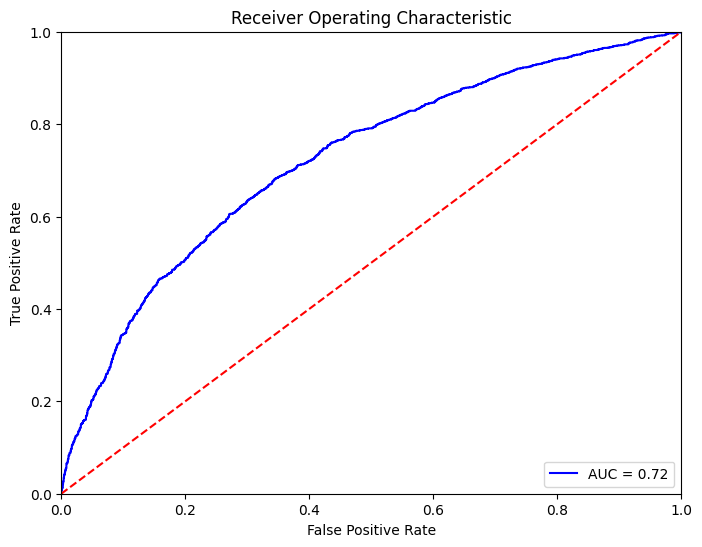

In [61]:
model_eval(XGB_model,X_test_RFE,y_test)

Seuil optimal : 0.14
Meilleur score associé : 2046


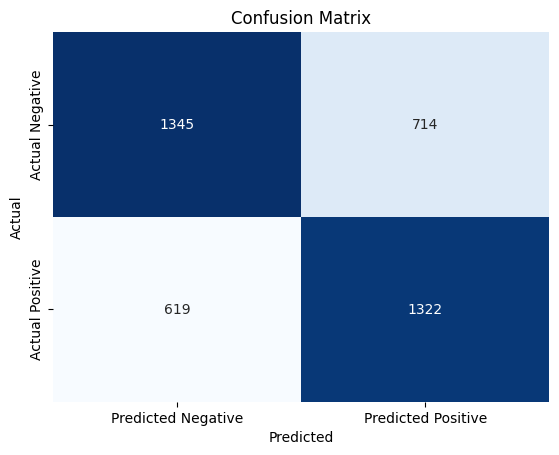

Accuracy score    : 0.667
precision score   : 0.649
recall score      : 0.681
F1 score          : 0.665
F2 score          : 0.674
ROCAUC score      : 0.667
custom metric FMI : 0.665
score business    : 2046



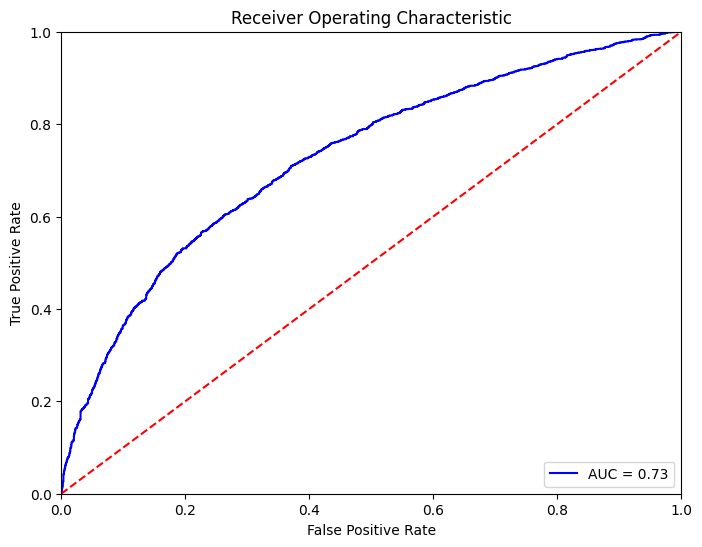

In [62]:
model_eval(CBC_model,X_test_RFE,y_test)

### Je décide de retenir CatBoostClassifier car c'est le modèle qui a les meilleurs scores. Je le sauvegarde

In [63]:
import joblib
joblib.dump(CBC_model,"Modèle de prédiction CatBoostClassifier")

['Modèle de prédiction CatBoostClassifier']

In [45]:
# Nom des features
mask= selectorbis.support_
data_reduit=X_train.loc[:,mask]
data_reduit.columns

Index(['AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'Amount_previous_credit'],
      dtype='object')

t=2023-12-12T12:53:49+0100 lvl=warn msg="failed to open private leg" id=bd326b777ac6 privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"


In [46]:
data_reduit.agg(['min', 'max', 'mean'])


AMT_CREDIT    AMT_ANNUITY    DAYS_BIRTH  DAYS_EMPLOYED  \
min   4.500000e+04    2596.500000 -25160.000000  -15632.000000   
max   3.020760e+06  149211.000000  -7680.000000  365243.000000   
mean  5.817011e+05   26827.147688 -15529.436187   53330.255125   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  EXT_SOURCE_3  \
min          -20981.000      -6228.00000      0.000038      0.000527   
max               0.000          0.00000      0.855000      0.885488   
mean          -4789.345      -2886.46775      0.466434      0.468301   

      DAYS_LAST_PHONE_CHANGE  Amount_previous_credit  
min             -4054.000000            0.000000e+00  
max                 0.000000            9.549418e+07  
mean             -901.440875            1.557176e+06

In [47]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


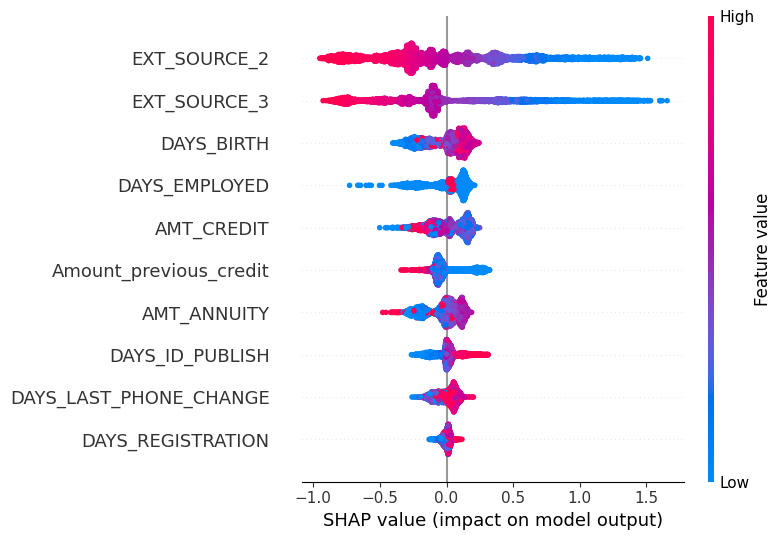

In [48]:
# Shap values
features_names=data_reduit.columns

explainer = shap.Explainer(CBC_model)
shap_values=explainer.shap_values(X_test_RFE)
shap.initjs
summary_plot_plot = shap.summary_plot(shap_values, X_test_RFE,feature_names=features_names)

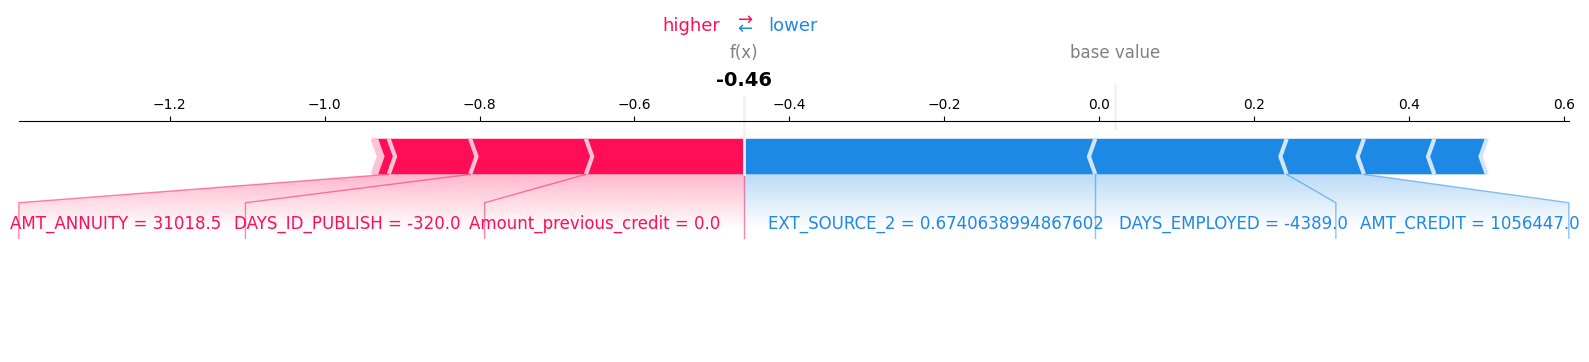

t=2023-12-12T12:54:04+0100 lvl=warn msg="failed to open private leg" id=175e81e3a438 privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"


In [49]:
# Exemple de force_plot pour un individu

shap_values=explainer.shap_values(X_test_RFE[[1]])
base_value = explainer.expected_value
force_plot = shap.force_plot(base_value, shap_values, X_test_RFE[[1]], feature_names=features_names,matplotlib=True)



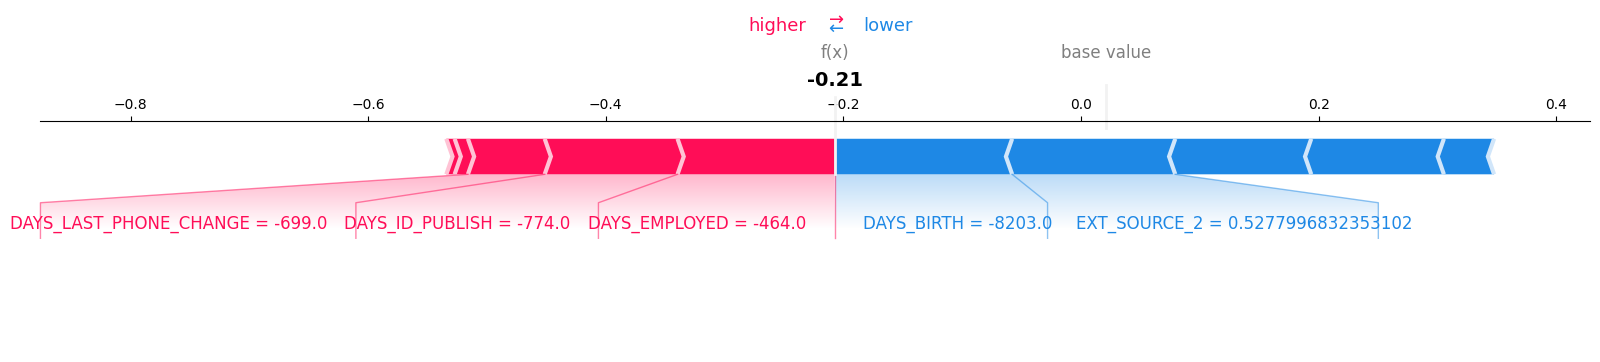

In [50]:
# Exemple de force_plot pour un autre individu

shap_values=explainer.shap_values(X_test_RFE[[25]])
base_value = explainer.expected_value
force_plot = shap.force_plot(base_value, shap_values, X_test_RFE[[25]], feature_names=features_names,matplotlib=True)


In [ ]:
#! pip install lime

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 73.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 KB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 KB 80.3 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283855 sha256=0753e2a420ff4c6a16c033fef4201c88a2914ae39101e81e2fd88129261ffdb4
  Stored in directory: /home/karima/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [51]:
import lime
from lime import lime_tabular

X_train_df = pd.DataFrame(X_train_RFE, columns=features_names)
X_test_df = pd.DataFrame(X_test_RFE, columns=features_names)
# Création de l'explainer
explainer = lime_tabular.LimeTabularExplainer(X_train_df.values, 
                                              feature_names=features_names.tolist(), 
                                              class_names=['0','1'], 
                                              verbose=True, 
                                              mode='classification')

# Choisissez un exemple spécifique à expliquer
i = 3

exp = explainer.explain_instance(X_test_df.values[i], CBC_model.predict_proba, num_features=10)

# Afficher l'explication
exp.show_in_notebook(show_table=True)

2023/12/12 12:54:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2f062d8f0bce45e7a2d936bd94451681', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/12/12 12:54:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ea56316f790e45b189958b7dd0467e7d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Intercept 0.5789837800722706
Prediction_local [0.20698851]
Right: 0.18679568060146928


t=2023-12-12T12:54:19+0100 lvl=warn msg="failed to open private leg" id=6bfb0f1d1f31 privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"


In [52]:
df_clients=data_reduit
df_clients.shape

(16000, 10)

In [53]:
df_clients["prediction"]=y_train
df_clients.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
3807     312840.0       8379.0    -16590.0         -500.0            -1381.0   
191     1125000.0      33025.5    -14340.0        -2936.0            -8403.0   
3351     630000.0      19228.5    -12556.0        -1420.0            -1627.0   
13381    270000.0      13500.0    -16871.0         -422.0            -2343.0   
417      790830.0      62613.0    -10930.0        -3255.0            -5582.0   

       DAYS_ID_PUBLISH  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
3807            -130.0      0.273115      0.510853                    -2.0   
191            -4990.0      0.487742      0.647977                 -2740.0   
3351           -4012.0      0.007748      0.506484                  -155.0   
13381           -395.0      0.727265      0.661024                  -390.0   
417             -810.0      0.595897      0.056861                  -170.0   

       Amount_previous_credit  prediction  
3807                 24270.39         1.0  
191                1884447.00         1.0  
3351               2814309.00         1.0  
13381              1729822.50         0.0  
417                2209908.60         1.0

t=2023-12-12T12:54:34+0100 lvl=warn msg="failed to open private leg" id=f23ee1fb9efc privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"
t=2023-12-12T12:54:49+0100 lvl=warn msg="failed to open private leg" id=b647e0bb04f2 privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"


In [54]:
0.028,_clients.csv",index=False)

## Analyse du DATA DRIFT

In [ ]:
#!pip install evidently

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 67.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 54.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 KB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 76.6 MB/s eta 0:00:00 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 KB 19.0 MB/s eta 0:00:00


t=2023-12-11T14:25:48+0100 lvl=warn msg="failed to open private leg" id=0714e0997b99 privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 KB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 KB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 KB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 22.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 13.0.0
    Uninstalling pyarrow-13.0.0:
      Successfully uninstalled pyarrow-13.0.0


t=2023-12-11T14:26:03+0100 lvl=warn msg="failed to open private leg" id=83a63d81eef2 privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"


In [55]:
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, DataQualityPreset, RegressionPreset


In [56]:
X_train_df = pd.DataFrame(X_train_RFE,columns=features_names)
X_test_df = pd.DataFrame(X_test_RFE,columns=features_names)

report = Report(metrics=[
    DataDriftPreset(), 
])

report.run(reference_data=X_train_df, current_data=X_test_df)
report


In [57]:
report.save_html('data_drift_report.html')

In [58]:
import json
dic_report = json.loads(report.json())


In [59]:
dic_report

{'version': '0.4.10',
 'metrics': [{'metric': 'DatasetDriftMetric',
   'result': {'drift_share': 0.5,
    'number_of_columns': 10,
    'number_of_drifted_columns': 0,
    'share_of_drifted_columns': 0.0,
    'dataset_drift': False}},
  {'metric': 'DataDriftTable',
   'result': {'number_of_columns': 10,
    'number_of_drifted_columns': 0,
    'share_of_drifted_columns': 0.0,
    'dataset_drift': False,
    'drift_by_columns': {'AMT_ANNUITY': {'column_name': 'AMT_ANNUITY',
      'column_type': 'num',
      'stattest_name': 'Wasserstein distance (normed)',
      'stattest_threshold': 0.1,
      'drift_score': 0.027767119585057735,
      'drift_detected': False,
      'current': {'small_distribution': {'x': [3172.5,
         14828.4,
         26484.3,
         38140.2,
         49796.1,
         61452.0,
         73107.9,
         84763.8,
         96419.7,
         108075.59999999999,
         119731.5],
        'y': [1.7716349659828928e-05,
         2.9984814557434435e-05,
         2.279

In [60]:
dic_report.keys()

dict_keys(['version', 'metrics', 'timestamp'])

In [61]:
drifted_feat = dic_report['metrics'][1]['result']['drift_by_columns']
drifted_feat

{'AMT_ANNUITY': {'column_name': 'AMT_ANNUITY',
  'column_type': 'num',
  'stattest_name': 'Wasserstein distance (normed)',
  'stattest_threshold': 0.1,
  'drift_score': 0.027767119585057735,
  'drift_detected': False,
  'current': {'small_distribution': {'x': [3172.5,
     14828.4,
     26484.3,
     38140.2,
     49796.1,
     61452.0,
     73107.9,
     84763.8,
     96419.7,
     108075.59999999999,
     119731.5],
    'y': [1.7716349659828928e-05,
     2.9984814557434435e-05,
     2.2799612213557085e-05,
     9.415832325260167e-06,
     3.903602467419933e-06,
     1.5228339295978869e-06,
     2.5738038246724815e-07,
     1.072418260280202e-07,
     2.1448365205604038e-08,
     6.434509561681204e-08]}},
  'reference': {'small_distribution': {'x': [2596.5,
     17257.95,
     31919.4,
     46580.850000000006,
     61242.3,
     75903.75,
     90565.20000000001,
     105226.65000000001,
     119888.1,
     134549.55000000002,
     149211.0],
    'y': [1.7661111281626305e-05,
     3.07

In [62]:
dico_drift = {}
for feat in drifted_feat.keys():
    if drifted_feat[feat]['drift_detected'] == False:
        dico_drift[feat] = round(drifted_feat[feat]['drift_score'], 3)


In [63]:
dico_drift

{'AMT_ANNUITY': 0.028,
 'AMT_CREDIT': 0.017,
 'Amount_previous_credit': 0.027,
 'DAYS_BIRTH': 0.03,
 'DAYS_EMPLOYED': 0.002,
 'DAYS_ID_PUBLISH': 0.05,
 'DAYS_LAST_PHONE_CHANGE': 0.037,
 'DAYS_REGISTRATION': 0.021,
 'EXT_SOURCE_2': 0.012,
 'EXT_SOURCE_3': 0.025}

In [64]:
drift_col = list(dico_drift.keys())
drift_col


['AMT_ANNUITY',
 'AMT_CREDIT',
 'Amount_previous_credit',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

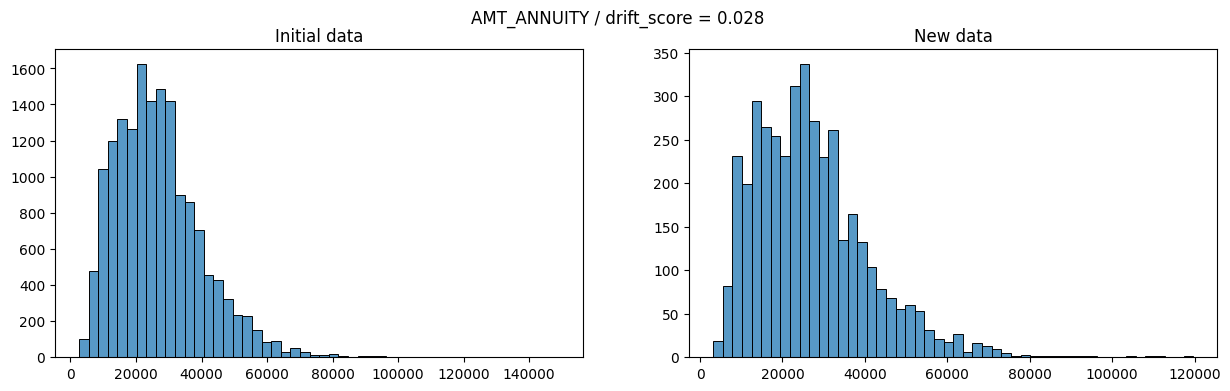

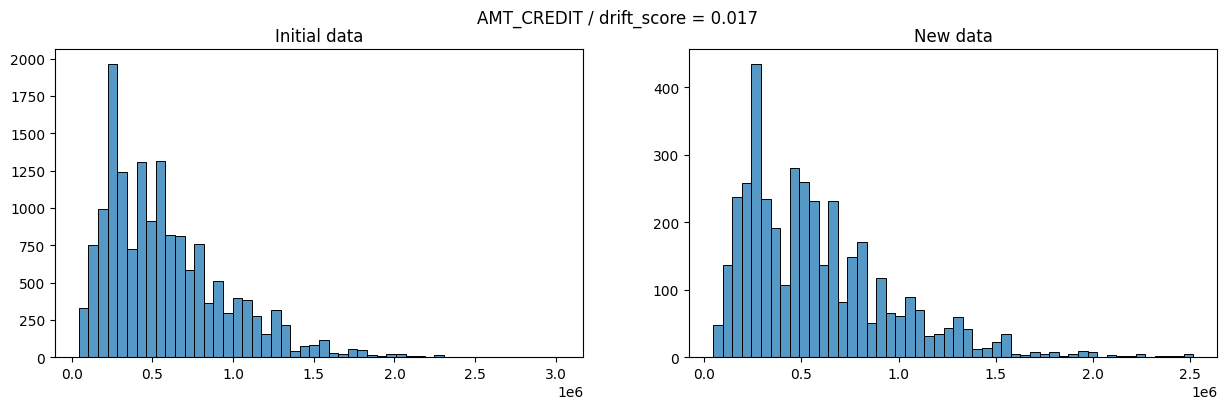

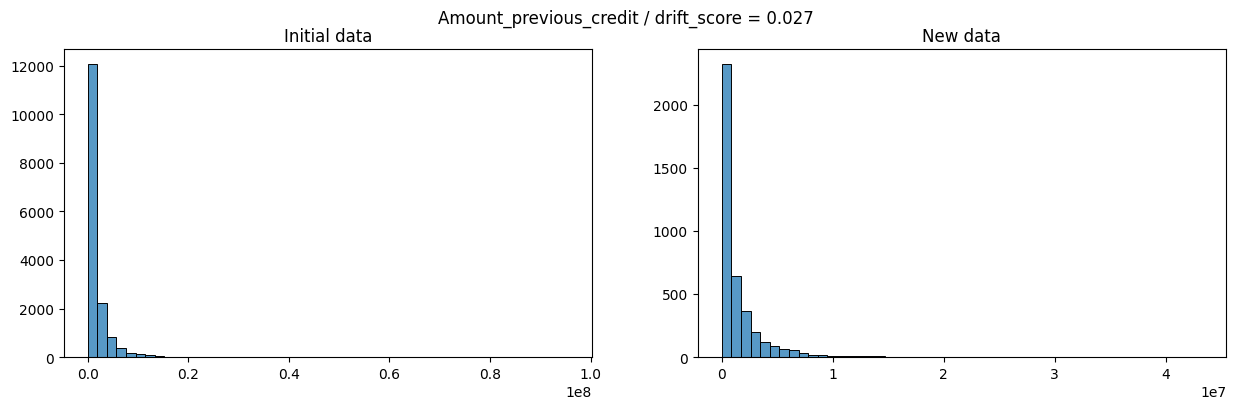

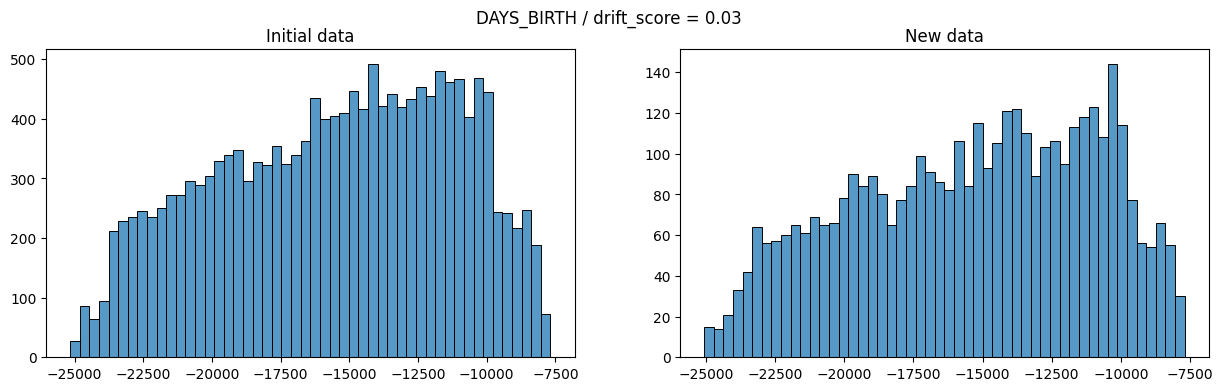

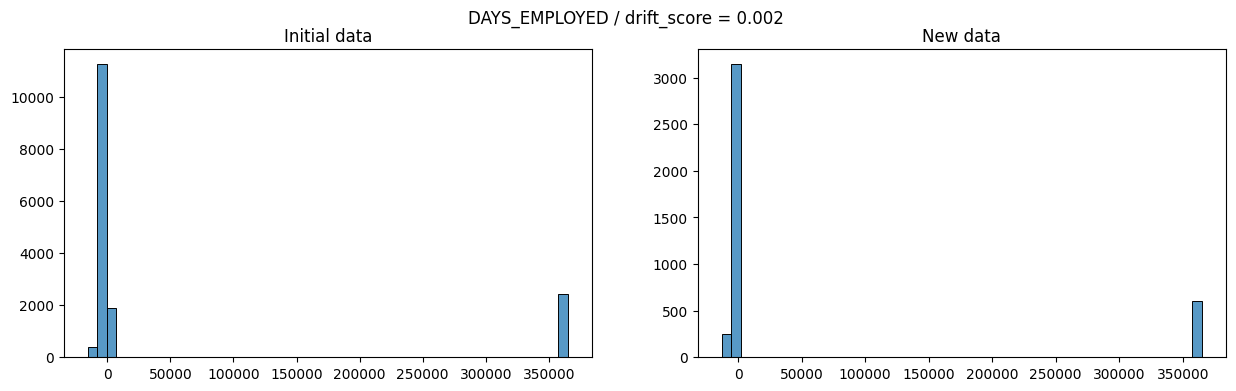

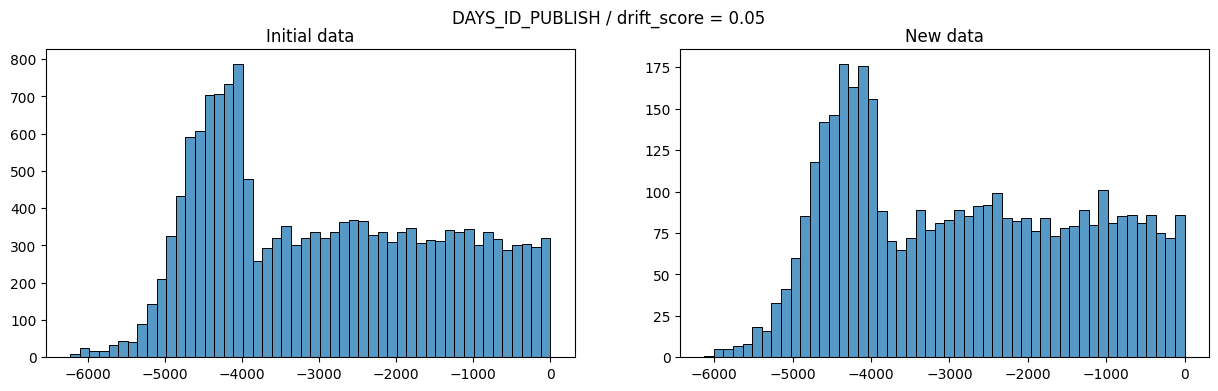

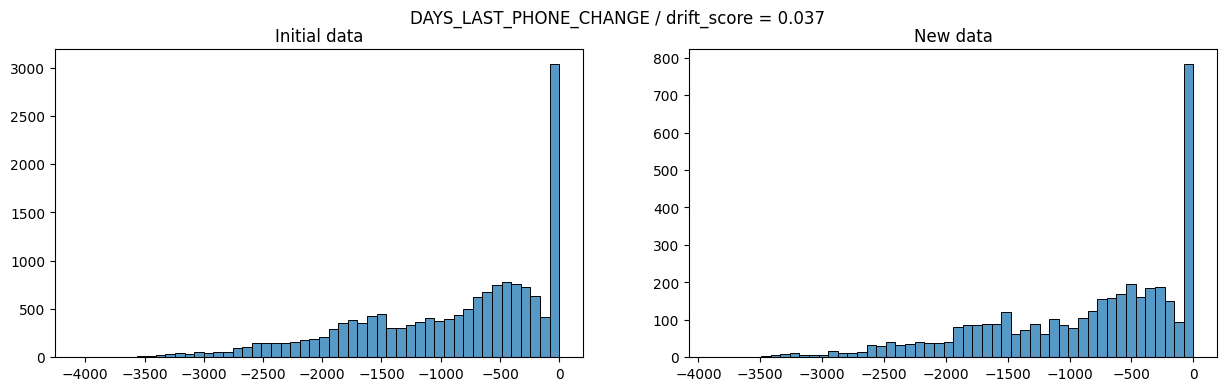

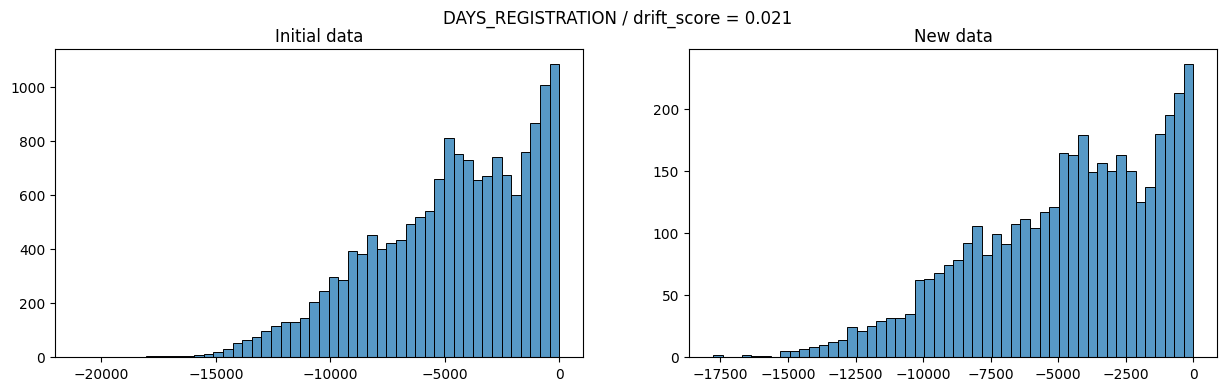

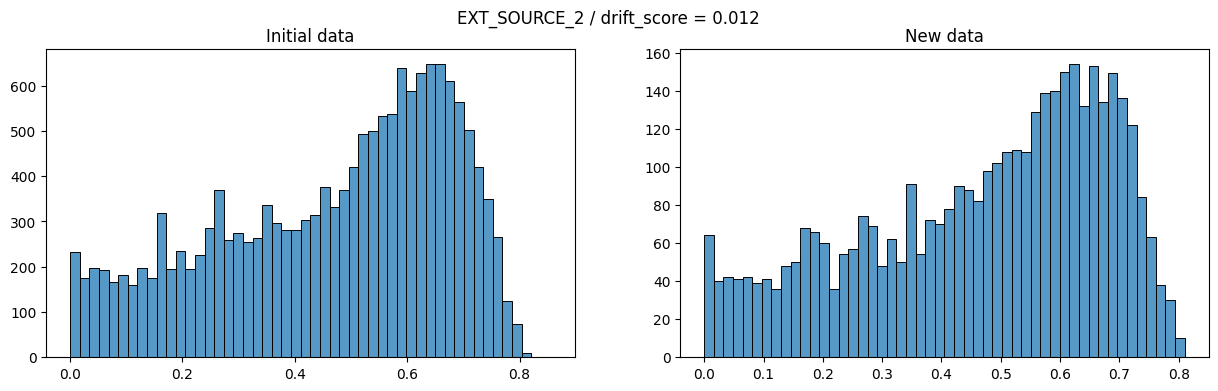

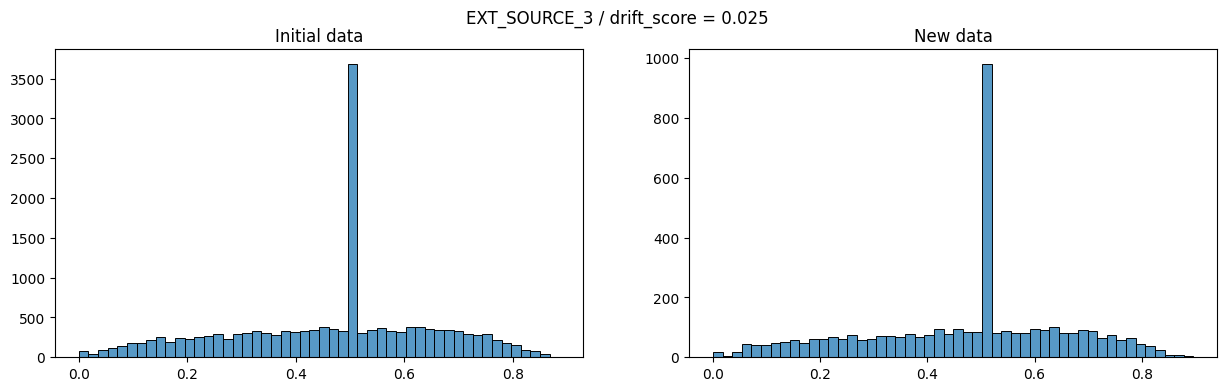

ERROR:pyngrok.process.ngrok:t=2023-12-12T13:42:58+0100 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=0a6a7b3911a0 clientid=ff896dcc48ae333ec7f4127e10920eec
ERROR:pyngrok.process.ngrok:t=2023-12-12T13:42:58+0100 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=40c2541aff9e err="session closed"
ERROR:pyngrok.process.ngrok:t=2023-12-12T13:42:58+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=40c2541aff9e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com on 127.0.0.53:53: server misbehaving"
ERROR:pyngrok.process.ngrok:t=2023-12-12T13:42:59+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=40c2541aff9e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com on 127.0.0.53:53: server misbehaving"
ERROR:pyng

In [65]:
for columns in drift_col:
    fig, ax = plt.subplots(1,2, figsize = (15, 4))
    sns.histplot(X_train[columns], bins = 50, ax = ax[0])
    ax[0].set_title('Initial data')
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    sns.histplot(X_test[columns], bins = 50, ax = ax[1])
    ax[1].set_title('New 0.028,data')
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    plt.suptitle(f'{columns} / drift_score = {dico_drift[columns]}')
    plt.show()
